Mappeoppgave 1  Kandidatnr: 5

In [121]:
import pandas as pd
#importerer pandas og bruker det for å lese csv filen
df = pd.read_csv("eiendomsdata_2019_2023_studenter.csv")



In [122]:
df = df[df["BRUKSENHETSTYPEKODE"] == "Bolig"]
df = df[df["SALGSBELOEP"] != 0]
df = df.drop_duplicates(subset=['REGISTERENHETID', 'BRUKSENHETSID', 'SALGS_DOKUMENTAAR', 'SALGSBELOEP']).copy()

**Kapittel 1 Innledning**

Introduksjon til Boligmarkedet 

Boligmarkedet har mye å si for innbyggernes velferd og livskvalitet. I et bra boligmarked vil alle kunne finne et trygt og økonomisk mulig sted å bo. Boligmarkedet er en stor del av økonomien i både en by og et land, og den vil påvirke personer på et personlig nivå. I tillegg kan boligmarkedet også brukes som en form for investering eller måte å spare penger på. Derfor kan man si at boligmarkedet har mange funksjoner på samfunnet vårt i dag. Dette inkluderer å bidra til noe som økonomisk stabilitet, og å påvirke urbaniseringsprosesser.

I disse tider er det mange som sier boligmarkedet har veldig høye priser. Dette kan føre til flere problemer både for individet og for samfunnet. Åpenbart nok vil tilgjengelighet bli et ganske stort problem. Høye priser gjør det vanskeligere for personer spesielt med lavinntekt å skaffe seg bolig. Det kan også føre til problemer som geografisk mobilitet. Høyere priser kan hindre til at personer flytter til steder med bedre jobbmuligheter. Økonomisk ulikhet kan også bli høyere, da uliikheten vil bli større mellom de som leier bolig, og de som eier bolig. Å undersøke hvordan høyere priser påvirker ulike demografiske grupper er verdifult for å forstå konsekvensene av dette.

Det er også flere eksterne kostnader som fører til høyere boutgifter enn bare boligpriser. Dette er blant annet energiutgifter. I disse tider med meget høye energipriser, kan dette gi en vesentlig kostnad til mange individer. Det er også kostnader som kkan oppstå ved reparasjoner og vedlikehold. Dette er en kostnad som spesielt kan merkes på eldre boliger. Andre faktorer som eiendomsskatter, forsikringskostnader, og transportutgifter fra boligen din til arbeidsplass, spiller også en sentral rolle i boutgiftene for husholdninger.

Reduseringer i boligpriser kan komme til av forsellige tiltak. Blant annet kan dette være å bygge flere boliger. Hvis myndighetene kan endre tilbudet lik etterspørselen vil boligprispene naturlig gå ned. Det kan være at de bygger ut flere offentlige boliger eller gir private utviklere insentiver til å bygge ut flere. Teknologiske løsninger kan også bidra til å redusere kostnader ved boligproduksjon. Dette inkluderer blant annet å effektivisere byggeprosesser, da det til slutt kan føre til lavere boligkostnader. 

For å se nærmere på boligmarkedet skal vi analysere boligmarkedet i tromsø i seg selv. Dette skal jeg gjøre ved å lage forskjellige modeller av data jeg har om boligmarkedet i tromsø. Dette vil handle om prisen på boligene, og ved å analysere de kan vi få frem faktorer som fører til forskjeller på prisene. Jeg kommer også til å gå inn på markedskrysset for boliger. Passer markedskrysset for boligmarkedet, og eventuelt hvorfor/hvorfor ikke? Til slutt skal vi se på tiltak som kan føre til lavere boligpriser. Dette vil inkludere veldig forskjellige tiltak, som mange vil ha forskjellige meninger på. 




**Kapittel 2 Analyse Av Boligmarkedet I Tromsø**

Vi skal nå se på boligmarkedet i tromsø. For å analysere dette har jeg et datasett med veldig mange verdier om eiendomsdata fra 2019 til 2023 for studenter. Det er veldig mye vi kan analysere ved ved bruk av dataen, og jeg skal derfor lage en god mengde figurer.

For å starte med analysen er det viktig at vi konverterer fra løpende til faste priser. Dette vil hjelpe ved så sammenligne de forskjellige årene.

In [123]:
import pandas as pd

#definerer kpi for de aktuelle årene.
KPI_flytende = [103.6, 105.5, 108.4, 110.8, 112.2, 116.1, 122.8, 129.6]
KPI_basis = 100

# beregner kpi indeksen basert på årene
def adjust_sales_by_kpi(row):
    year_index = row['SALGS_DOKUMENTAAR'] - 2016  
    if 0 <= year_index < len(KPI_flytende):
        return row['SALGSBELOEP'] * (KPI_basis / KPI_flytende[year_index])

# legger til kolonnen i dataframet
df['Justert_SALGSBELOEP'] = df.apply(adjust_sales_by_kpi, axis=1)

For å se dette på et stort bilde og få et umiddelbart intrykk av hvor stort markedet er, er det viktig å se på antall solgte boliger. Vi skal nå se på antall solgte boliger hvert år.

In [124]:
sales_per_year = df.groupby('SALGS_DOKUMENTAAR').size()
print(sales_per_year)



SALGS_DOKUMENTAAR
2019    2009
2020    2191
2021    2226
2022    1893
2023    1572
dtype: int64


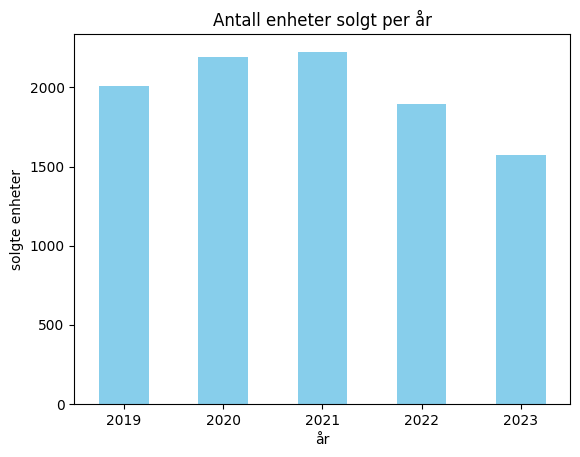

2019: 2009.00
2020: 2191.00
2021: 2226.00
2022: 1893.00
2023: 1572.00


In [125]:
import matplotlib.pyplot as plt
#plotter funksjonen
sales_per_year.plot(kind='bar', color='skyblue')
plt.title("Antall enheter solgt per år")
plt.xlabel("år")
plt.ylabel("solgte enheter")
plt.xticks(rotation=0)
plt.show()
for year, price in sales_per_year.items():
    print(f'{year}: {price:.2f}')

Vi har nå sett på antall solgte boliger hvert år. Det ses ut til å ha en ganske drastisk nedgang fra 2021-2023. I 2021 hadde vi et høyt nivå på over 2200, men i 2023 gikk den ned til 1572. 

For å se hva prisen er på de fleste boligene, er det ofte viktig å se på medianprisen. Vi skal detfor nå se på medianprisen på boligene fra 2019-2023

In [126]:
#lager en ny variabel som inneholder medianprisen hvert år
median_price_per_year = df.groupby("SALGS_DOKUMENTAAR")["Justert_SALGSBELOEP"].median()


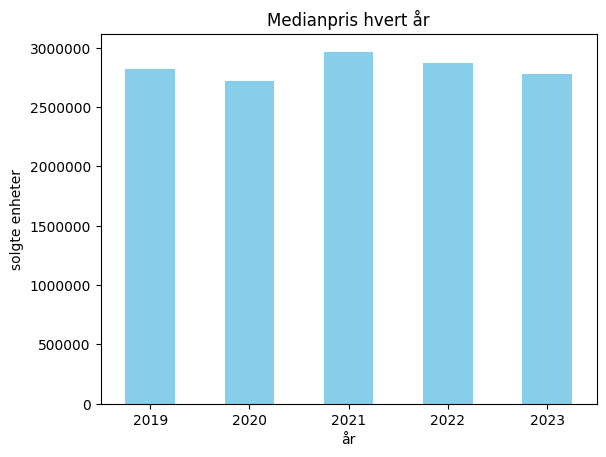

2019: 2820397.11
2020: 2718360.07
2021: 2967269.60
2022: 2874592.83
2023: 2777777.78


In [127]:
#plotter den nye variabelen
median_price_per_year.plot(kind='bar', color='skyblue')
plt.title("Medianpris hvert år")
plt.xlabel("år")
plt.ylabel("solgte enheter")
plt.xticks(rotation=0)
plt.ticklabel_format(useOffset=False, style="plain", axis ="y")
plt.show()
for year, price in median_price_per_year.items():
    print(f'{year}: {price:.2f}')

Her ser vi at medianprisen hvert år ikke har endret selg noe veldig mye. Dette er jo også som følge av at vi har konvertert prisene til faste

Vi skal nå se på medianprisen på boliger i forskjellige deler av tromsø, for å finne ut om det er noen forskjeller der. Datasettet inkluderer postnummer, slik at det er mulig å fordele inntekten på postnummer. Da det er veldig vange postnummer, har jeg valgt ut noen forskjellige fra forskjellige steder, og regnet medianverdien på dem

In [128]:
#legger inn forskjellige postnummer til forskjellige bydeler
postnummer_navn = {
    9008: "Sentrum",
    9016: "Tromsøya-vest",
    9022: "Krokelvdalen",
    9103: "Kvaløya",
    9118: "Brensholmen",
    9131: "Kaarvik"
}

#legger postnavnene til postnumrene
df["Bydeler"] = df["POSTNUMMER"].map(postnummer_navn)
pris_per_bydel = df.groupby("Bydeler")["Justert_SALGSBELOEP"].median()

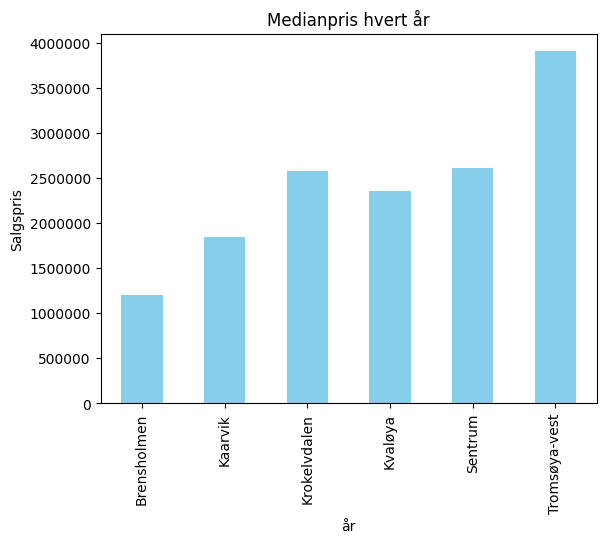

In [129]:
#plotter poststedene
pris_per_bydel.plot(kind='bar', color='skyblue')
plt.title("Medianpris hvert år")
plt.xlabel("år")
plt.ylabel("Salgspris")
plt.xticks(rotation=90)
plt.ticklabel_format(useOffset=False, style="plain", axis ="y")
plt.show()

Vi ser her at Tromsøya-Vest har desidert høyeste priser. Dette gir mening, da det er rundt flyplassen på et veldig industrialisert område. Mange vil bo her, grunnet av tilgjengelighet og transportmuligheter. Områder nær flyplasser har ofte bedre infrastruktur flere muligheter for transport, noe som gjør disse områdene veldig attraktiv. Prisene vil derfor naturligvis gå opp. Vi ser at de ellers er ganske lik, men nederst på boligprisene ser vi Brensholmen. Det er kan være flere grunner til det. Det er et område med veldig lite muligheter innenfor forskjellige yrker, transport vil også være ganske begrenset. Dette fører til lav etterspørsel etter boligene på dette området, noe som vil føre til lavere priser.

Det kan ofte skje at forskjellige tidspunkter på året utgir forskjellige priser til boliger. Vi skal nå se på gjennomsnittsprisen i de forskjellige kvaralene i året

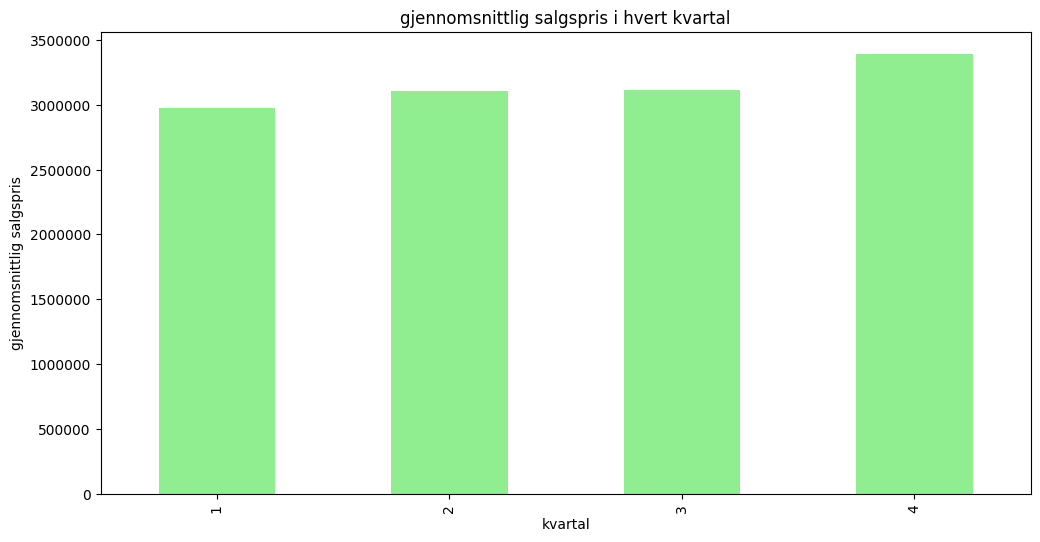

1. kvartal: 2974359.18
2. kvartal: 3104793.18
3. kvartal: 3114708.69
4. kvartal: 3392252.30


In [130]:
df["DOKUMENTDATO"] = pd.to_datetime(df['DOKUMENTDATO'], format='%d/%m/%Y')
df["KVARTAL"] = df["DOKUMENTDATO"].dt.quarter
avg_price_per_quarter = df.groupby('KVARTAL')['Justert_SALGSBELOEP'].mean()
avg_price_per_quarter = avg_price_per_quarter.reindex([1, 2, 3, 4])
plt.figure(figsize=(12,6))
avg_price_per_quarter.plot(kind='bar', color='lightgreen')
plt.title("gjennomsnittlig salgspris i hvert kvartal")
plt.xlabel("kvartal")
plt.ylabel("gjennomsnittlig salgspris")
plt.xticks(rotation=90)
plt.ticklabel_format(useOffset=False, style="plain", axis ="y")
plt.show()
for quarter, price in avg_price_per_quarter.items():
    print(f'{quarter}. kvartal: {price:.2f}')

Her ser vi at salgsprisene til boligene blir dyrere i gjennomsnitt jo senere det blir på året, men ikke en veldig betydelig forskjell. Det er flere grunner for dette. Jeg har en hypotese om at studenter kan være en faktor til dette. Å øke tilbudet i boligmarkedet, krever ofte veldig mye tid og ressurser. Tromsø har veldig mange studenter, grunnet av uit. Første halvår er på høsten, og da blir det ofte stort press på boligene. Siden det er vanskelig å skape høyere tilbud blir prisen høyere, grunnet av økningen i etterspørsel. 

In [131]:
max_loan_value = 3170000

Sykepleierindeksen = {}
for year in range(2019, 2024):
    #filtrerer for hvert år
    yearly = df[df['SALGS_DOKUMENTAAR'] == year]
    # teller hvor mange boliger en sykepleier har råd til å kjøpe
    affordable_count = (yearly['SALGSBELOEP'] <= max_loan_value).sum()
    # regner ut totale mengden boliger for året
    total_boliger = len(yearly)
    # beregner sykepleierindeksen
    Sykepleierindeksen[year] = (affordable_count / total_boliger * 100) 

Sykepleierindeksen

{2019: 50.87108013937283,
 2020: 53.08078502966682,
 2021: 41.19496855345912,
 2022: 39.03856312731115,
 2023: 38.3587786259542}

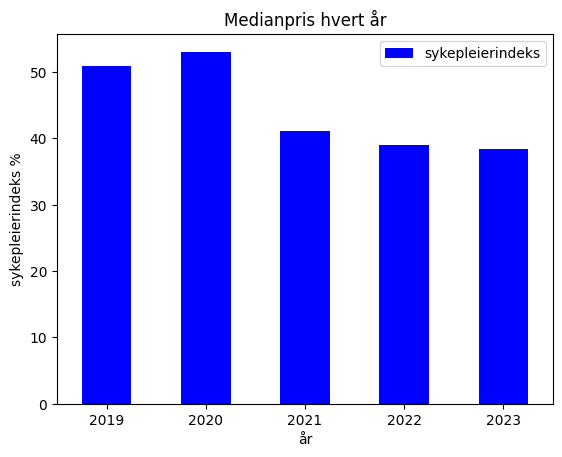

In [132]:
Sykepleierindeksen = pd.DataFrame.from_dict(Sykepleierindeksen, orient="index", columns=["sykepleierindeks"])
Sykepleierindeksen.plot(kind = "bar", color = "blue")
plt.title("Medianpris hvert år")
plt.xlabel("år")
plt.ylabel("sykepleierindeks %")
plt.xticks(rotation=0)
plt.ticklabel_format(useOffset=False, style="plain", axis ="y")
plt.show()

Vi ser at sykepleierindeksen har hatt en betydelig nedgang siden 2020, og har bare gått ned år for år etter det. I 2020 var den på 53.08, da den gikk til 38.36 i 2023. Det indikerer på at det har vært en betydelig forværring i boligoverkommeligheten for sykepleiere i de siste årene. 


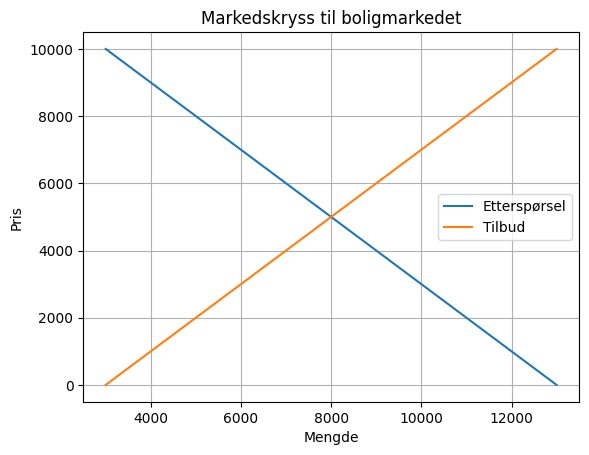

In [133]:
#importerer numpy og bruker det for å dele opp en sekvens på 100 tall av 0 til 10000.
import numpy as np
priser = np.linspace(0, 10000, 100)

#Definerer etterspørselsfunksjonen, og setter den maksimale etterspørselen på 13000
def etterspørsel(pris, a=13000, b=1):
    return a - b * pris

#Definerer tilbudsfunksjonen, og setter minimal tilbud til 3000
def tilbud(pris, c=3000, d=1):
    return c + d * pris

# regner mengden etterspørsel og tilbud for alle prisnivåer
mengde_etterspørsel = etterspørsel(priser)
mengde_tilbud = tilbud(priser)

# plotter grafen
plt.plot(mengde_etterspørsel, priser, label = "Etterspørsel")
plt.plot(mengde_tilbud, priser, label = "Tilbud")
plt.xlabel("Mengde")
plt.ylabel("Pris")
plt.title("Markedskryss til boligmarkedet")
plt.legend()
plt.grid(True)
plt.show()

**Kapittel 3 Del 1 Markedskrysset I Boligmarkedet**

Tilbuden og etterspørselen bestemmes av flere faktorer. Økonomiske forhold og geografiske områder to faktorer som er veldig sentralt her. som vi så på figurene tidligere, ser vi at noen områder har mye høyere priser enn andre. Dette oppstår som en effekt av tilbud og etterspørsel, da prisene går opp ved høy etterspørsel. Noe som også er veldig viktig er rentenivåene. Dersom renten er høy vil det koste mer for personer å bo på disse områdene. Dette kan dermed redusere etterspørselen, eller motsatt hvis renten blir lavere. Ser man på den andre siden, kan også rente påvirke tilbudskurven. Høyere renter kan påvirke byggekostnader og kostnader for investering. Dette kan gjøre det mindre lønnsomt for å tilby boliger, noe som kan skyve tilbudskurven til venstre. 

Det er flere forutsetninger bak markedskrysset som ikke blir helt oppfylt i boligmarkedet. Dette markedet har ikke perfekt konkurranse. Til tross for at det er mange kjøpere og selgere, er de fleste boliger forskjellig. Noen boliger er plassert på områder som mange vil mene har en "bedre" beliggenhet. F.eks. at boligene har en nærmere tilgang til transportmodler og lignende.Dette kommer også inn på at markedskrysset baserer seg på homogene varer. Det kan høres homogent ut, da det kun er snakk om boliger, men boligene i seg selv er veldig heterogene. Noen er større enn andre, noen har kanskje bedre kvalitet og er yngre. Dette kan gjøre det vanskelig å sammenligne priser i modellen. Noe annet som er sentralt bak markedskrysset er at det skal ha en rask tilpasning. Det forutsetter seg at likevekten skal tilpasse seg og endre seg umiddelbart etter endringer av tilbud og etterspørsel i markedet. I boligmarkedet kan det ofte ta lang til å selge, kjøpe eller å bygge boliger. Derfor kan justeringer ta mye lengre tid enn det som er forutsatt i markedskrysset. Det er også forutsatt at markedskrysset ikke skal ha noen eksterne påvirkninger. I et boligmarked er det eksterne effekter. Ny infrastruktur som nye veier og tunneller er eksterne effekter som kan påvirke verdien av boligene. Selv med disse problemene ved markedskrysset i boligmarkedet, kan man fortsatt bruke den som en nyttig modell. Den vil fortsatt gi oss innblikk i aspekter som prisdannelse og markedsendringer. 

Noe viktig å gå inn på for å få et estimat på sentrale parameter, er å se på priselastisiteten for tilbud og etterspørsel til boligmarkedet. I boligmarkedet vil priselastisiteten til etterspørselen generelt være ganske lav, da boliger ofte ses på som en nødvendighetsgode. Det vil si at det er noe som vi "må" ha, det er vanskelig å leve uten bolig. Altså hvis prisen da endres, trenger fortsatt folk bolig, og dermed vil ikke etterspørselen endre seg dramatisk. Dette baserer seg selvfølgelig på majoriteten av boligene der ute, det vil være annerledes med veldig dyre boliger, eller kalt "luksus boliger". De kan endre seg mye, da de ikke er en stor nødvendighet, sammenlignet med andre boliger. Ser man dette på tilbudet, vil det variere om man ser på kort eller lang sikt. Elastisiteten baserer seg på faktorer som byggekostnader og reguleringer. Dermed, kan man si at de generelt er ganske elastiske, da det er mange forskjellige kostnader som fører til om boligene bilr bygget eller ikke. Dette vil kun være sant på lang sikt, da det å bygge boliger kan ta lang tid. På kort sikt vil den ikke være like elastisk, siden tilbudet kan ikke endre seg før boligene har blitt bygget. 

**Kapittel 3 Del 2 Tiltak for å resudere priser i boligmarkedet**

Vi skal nå se på tiltak som kan føre til reduserte priser for boligmarkedet til Tromsø. 
Et forslag som ofte kan komme fra venstresiden i politikken, kan være å fjerne skattefordeler for sekundærboliger. Dette kan føre til at investeringene dempes, noe som kan senke boligprisene. Det kan funke på en måte slik at boliger ikke kjøpes som kun som investeringsobjekter. Hvis investorer trekker seg tilbake, vil det bli mindre press på boligmarkedet, altså at etterspørselen blir mindre. Da er det høyere tilbud for boliger, og prisen kan gå ned som en følge den negative endringen i etterspørsel. Da kan boligmarkedet bli mer tilgjengelig for førstegangskjøpere og folk som faktisk ser etter en bolig å bo i. Det vil da ha en negativ konsekvens for investorer, og de som allerede eier flere boliger, mens en positiv konsekvens for førstegangskjøpere. Det samfunnsøkonomiske overskuddet vil sannsynligvis nok øke, dersom tiltaket gjør at flere får tilgang til boligmarkedet. dersom det ikke blir mange nye etterspørrere i form for førstegangskjøpere, kan reduksjonen i investeringer ha en negativ effekt.
Et annet tiltak kan være å redusere byggekostnader og å forenkle reguleringer. Når disse tiltakene blir tatt i bruk, kan tilbudet øke. Det blir mer attraktivt for byggefirmaer å bygge boliger hvis det koster mindre, og de kan ta på seg flere prosjekter. Da kan det bli flere tilgjengelige boliger på markedet, og personer vil ha flere boliger å velge mellom. Prisen vil da falle når tilbudet øker, for at personer skal etterspørre etter disse nye boligene. Det vil nok bli et samfunnsøkonomisk overskudd grunnet av en økt mengde oliger. Det kan også føre til en mer eeffektiv utnyttelse av landressursene.
Et annet tiltak som kan være effektivt er en progressiv eiendomsskatt. En progressiv eiendomsskatt som øker jo flere boliger en person eier, vil oppmuntre flere boliger til å komme på markedet. Dette skjer som følge ved at det blir dyrere å eie flere boliger. Dermed kan det hende at flere boliger blir som spesielt ofte blit ubrukt kommer på markedet, og det vil skape et høyere tilbud. Nye boligkjøpere vil nok vinne av dette, da de får boligene billigst, og de blir brukt mest effektivt. Personer som eier flere boliger, vil merke en negativ konsekvens av dette tiltaket. Det kan bli et overskudd da flere boliger blir tilgjenegelige for bruk, da de blir brukt mest effektivt, og det blir dyrere å spekulere i boligmarkedet. Vi ser ofte at boligmarkedet har stort press på enkelte områder, og det er ikke er veldig fordelt over store områder. Det er tiltak som kan hjelpe med dette, og vil også føre til billigere boligpriser. Gjennom å gi insentiver til å investere i transport og infrastruktur i områder med mindre boligpress, kan disse områdene bli mer attraktive for boligbygging. Det kan føre til at boligetterspørselen blir spredt mer jevnt over et større område, og områdene i de populære områdene vil få deres prispress redusert. Områder og innbyggerne til områder med mindre attraktivitet vil vinne med dette tiltaket, da disse områdene kan blir mer utviklet og tiltrekkende. Det samfunnsøkonomiske overskuddet kan øke ved at boligetterspørselen blir mer balansert, og at flere ressurser blir brukt mer effektivt over et mye større geografisk område. Dette kan føre til en mer bærekraftig urban utvikling.

I denne analysen har vi analysert boligmarkedet i Tromsø. Vi har ved hjelp av modeller analysert utviklingen av boligpriser og andre viktigheter i boligmarkedet. På mange av disse faktorene ser det ut til at boligmarkedet har forværret seg betraktelig i de siste årene. Det største beviset av det kommer fra sykepleierindeksen. Den har gått ned med over betraktelig fra 2020 til 2023, med over 10% nedgang. Vi har også sett på markedskrysset i boligmarkedet. Det er mange faktorer som påvirker markedskrysset, og gjør at det ikke er perfekt brukt på boligmarkedet. Blant annet er dette faktorer som perfekt konkurranse, eksterne effekter, hetrogenitet og ikke umiddelbare tilbud/etterspørsel endringer ved prisendringer. Da det har sine problemer, viser det fortsatt grunnleggende prinsipper som prisdannelse, og endringer på markedet ved endringer av tilbud og etterspørsel. Vi så også på tiltak for å redusere priser i et boligmarked. Disse inkluderer tilktak som å fjerne skattefordeler for sekundærboliger, og en reduksjon av byggekostnader og en forenkling av reguleringer. 

appendiks: 
https://chat.openai.com/c/ccc131a6-7d07-4203-8f90-776fcfe6d05e

https://chat.openai.com/c/6f90cfb2-dfe5-4e3b-b2ea-1be9258ceac1 (for å bedre prints)
